In [1]:
# Import necessary libraries
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns

from src.task_2 import load_data, extract_features, prepare_pre_post_treatment_data, get_control_case_groups

In [2]:
# Load data
data = load_data("data/metadata.csv", "data/cell_detection_results")

In [3]:
# Apply feature extraction to each biopsy
features = extract_features(data)

In [4]:
display(features)

,patient_id,arm,treatment,total_cells,malignant_cells,normal_cells,malignant_ratio
0,0,control,post,14154.0,5465.0,8689.0,0.386110
1,0,control,pre,15602.0,6744.0,8858.0,0.432252
2,1,control,post,14158.0,5721.0,8437.0,0.404082
3,1,control,pre,7479.0,3438.0,4041.0,0.459687
4,2,control,post,15807.0,6883.0,8924.0,0.435440
...,...,...,...,...,...,...,...
295,147,case,pre,73921.0,27084.0,46837.0,0.366391
296,148,case,post,9822.0,3072.0,6750.0,0.312767
297,148,case,pre,13571.0,5971.0,7600.0,0.439982
298,149,case,post,11103.0,3254.0,7849.0,0.293074


In [5]:
# Merge pre and post treatment data
pre_post_data = prepare_pre_post_treatment_data(features)

In [6]:
display(pre_post_data)

,patient_id,arm,treatment_pre,total_cells_pre,malignant_cells_pre,normal_cells_pre,malignant_ratio_pre,treatment_post,total_cells_post,malignant_cells_post,normal_cells_post,malignant_ratio_post,change_in_malignant_ratio
0,0,control,pre,15602.0,6744.0,8858.0,0.432252,post,14154.0,5465.0,8689.0,0.386110,0.046142
1,1,control,pre,7479.0,3438.0,4041.0,0.459687,post,14158.0,5721.0,8437.0,0.404082,0.055605
2,2,control,pre,10079.0,4179.0,5900.0,0.414624,post,15807.0,6883.0,8924.0,0.435440,-0.020816
3,3,control,pre,9747.0,4348.0,5399.0,0.446086,post,12707.0,2612.0,10095.0,0.205556,0.240530
4,4,control,pre,8133.0,2918.0,5215.0,0.358785,post,19751.0,5835.0,13916.0,0.295428,0.063357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,case,pre,14838.0,4817.0,10021.0,0.324639,post,14922.0,5541.0,9381.0,0.371331,-0.046691
146,146,case,pre,8247.0,3324.0,4923.0,0.403056,post,32358.0,12666.0,19692.0,0.391433,0.011622
147,147,case,pre,73921.0,27084.0,46837.0,0.366391,post,16985.0,5938.0,11047.0,0.349603,0.016789
148,148,case,pre,13571.0,5971.0,7600.0,0.439982,post,9822.0,3072.0,6750.0,0.312767,0.127215


In [7]:
# Separate data into case and control groups
case_group, control_group = get_control_case_groups(pre_post_data)

In [8]:
# Shapiro-Wilk test for normality
shapiro_case = shapiro(case_group)
shapiro_control = shapiro(control_group)
print(f"Shapiro-Wilk test for case group: {shapiro_case}")
print(f"Shapiro-Wilk test for control group: {shapiro_control}")

# Levene's test for homogeneity of variances
levene_test = levene(case_group, control_group)
print(f"Levene's test for homogeneity of variances: {levene_test}")

Shapiro-Wilk test for case group: ShapiroResult(statistic=0.9748601259726796, pvalue=0.14102180024070315)
Shapiro-Wilk test for control group: ShapiroResult(statistic=0.9892243311403955, pvalue=0.7804592064521971)
Levene's test for homogeneity of variances: LeveneResult(statistic=1.7091204726235225, pvalue=0.1931268928585902)


In [9]:
# Cohen's d for t-test
cohen_d = pg.compute_effsize(case_group, control_group, eftype="cohen")
print(f"Cohen's d: {cohen_d}")

# Rank-biserial correlation for Mann-Whitney U
rank_biserial = pg.compute_effsize(case_group, control_group, eftype="r")
print(f"Rank-biserial correlation: {rank_biserial}")

Cohen's d: -0.17404527210872428
Rank-biserial correlation: -0.006657859958704767


In [10]:
alpha = 0.05
power_analysis = TTestIndPower()
sample_size = len(case_group) + len(control_group)
power = power_analysis.solve_power(effect_size=cohen_d, nobs1=len(case_group), alpha=alpha)
print(f"Power of the test: {power}")

Power of the test: 0.18504537044025232


In [11]:
# Conduct statistical tests
# Independent t-test (parametric)
t_stat, p_value = ttest_ind(case_group, control_group)
print(f"Independent t-test: t_stat={t_stat}, p_value={p_value}")

Independent t-test: t_stat=-1.065805272025568, p_value=0.28824730074623


In [12]:
# Mann-Whitney U test (non-parametric)
u_stat, p_value = mannwhitneyu(case_group, control_group)
print(f"Mann-Whitney U test: u_stat={u_stat}, p_value={p_value}")

Mann-Whitney U test: u_stat=2612.0, p_value=0.45220407591341094


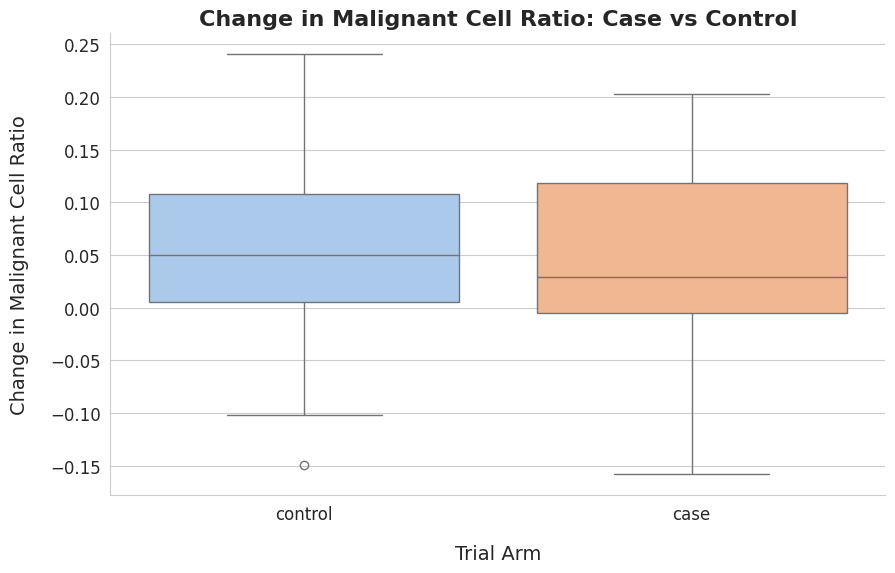

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="arm", y="change_in_malignant_ratio", hue="arm", data=pre_post_data, palette="pastel", legend=False)
plt.title("Change in Malignant Cell Ratio: Case vs Control", fontsize=16, fontweight="bold")
plt.xlabel("Trial Arm", fontsize=14, labelpad=15)
plt.ylabel("Change in Malignant Cell Ratio", fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
ax.yaxis.grid(True)
plt.show()

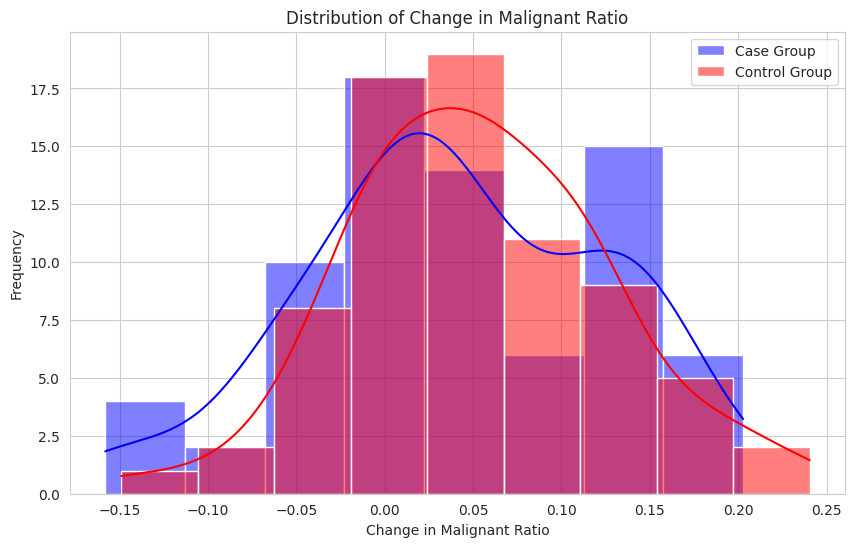

In [14]:
# Visualize data distributions
plt.figure(figsize=(10, 6))
sns.histplot(case_group, kde=True, label="Case Group", color="blue")
sns.histplot(control_group, kde=True, label="Control Group", color="red")
plt.legend()
plt.title("Distribution of Change in Malignant Ratio")
plt.xlabel("Change in Malignant Ratio")
plt.ylabel("Frequency")
plt.show()

## Statistical Analyses and Interpretation

### Objective
The objective of this task was to assess the statistical differences in the change of malignant cell ratios between pre- and post-treatment tissue biopsies from patients treated with drug X (case group) and those who were not (control group).

### Statistical Hypotheses
We formulated the following hypotheses to compare the difference between the control and case groups:
- **Null Hypothesis (H0):** There is no significant difference in the change of malignant cell ratios between the case and control groups.
- **Alternative Hypothesis (H1):** There is a significant difference in the change of malignant cell ratios between the case and control groups.

### Cell-based Features
The primary feature of interest was the change in malignant cell ratio from pre- to post-treatment, calculated for each patient. This was computed as:
\[ \text{change\_in\_malignant\_ratio} = \text{malignant\_ratio\_pre} - \text{malignant\_ratio\_post} \]

### Statistical Testing Methods
To determine the statistical difference between the case and control groups, two tests were conducted:
1. **Independent t-test (parametric test):** Assumes that the data follows a normal distribution.
2. **Mann-Whitney U test (non-parametric test):** Does not assume any specific distribution of the data.

### Results

#### Assumption Checks
- **Shapiro-Wilk Test for Normality**:
  - Case group: \( p = 0.141 \) (not significant, suggesting normal distribution)
  - Control group: \( p = 0.780 \) (not significant, suggesting normal distribution)
- **Levene's Test for Homogeneity of Variances**:
  - \( p = 0.193 \) (not significant, suggesting equal variances)

These results indicate that the assumptions for conducting a t-test are met.

#### Independent t-test
- **t-statistic:** -1.0658
- **p-value:** 0.2882

The t-test indicates no significant difference in the change of malignant cell ratios between the case and control groups (p-value > 0.05).

#### Mann-Whitney U test
- **U-statistic:** 2612.0
- **p-value:** 0.4522

Similarly, the Mann-Whitney U test confirms no significant difference in the change of malignant cell ratios between the case and control groups (p-value > 0.05).

#### Effect Size Calculations
- **Cohen's d**: \( d = -0.174 \)
  - This indicates a small negative effect size, meaning there is a slight reduction in malignant cell ratio in the case group compared to the control group, but it's not substantial.
- **Rank-biserial Correlation**: \( r = -0.0067 \)
  - This is a very small effect size, suggesting minimal difference between the groups.

#### Power Analysis
- **Power of the t-test**: \( 0.185 \)
  - This indicates a low probability of detecting a true effect if one exists. A power of 0.8 is generally considered acceptable, suggesting that the sample size may be too small to detect a meaningful difference.

### Interpretation
Both the independent t-test and the Mann-Whitney U test suggest that there is no statistically significant difference in the change of malignant cell ratios between patients treated with drug X (case group) and those who were not (control group). This indicates that drug X may not have a significant effect on reducing the malignant cell ratio in the tissue biopsies analyzed. The effect sizes are small, indicating minimal practical differences between the groups. The low power of the test suggests that the study may not be adequately powered to detect a true effect, indicating that a larger sample size might be needed for more definitive conclusions.

### Conclusion
Based on the statistical analyses conducted, the null hypothesis cannot be rejected. The results suggest that drug X does not significantly alter the malignant cell ratio in patients compared to those who did not receive the treatment. However, further investigation with a larger sample size or additional biomarkers may be required to draw more definitive conclusions. Considering additional cell-based features, and ensuring robust sample sizes could further enhance the reliability and insights of future studies.